In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import sys
import os
from scipy import stats
import math
from scipy.optimize import curve_fit
from scipy.stats import norm
import seaborn as sns
import pandas as pd

In [43]:
def load_pd_positions(dirPath, experiment_type):
    if(experiment_type!="experiment" and experiment_type!="baseline"):
        print("experiment_type could be only $experiment or $baseline")
        exit(-1)
    
    num_experiment = len([name for name in os.listdir(dirPath) if (os.path.isfile(os.path.join(dirPath, name)) and (name.endswith('position.tsv')))])
    
    if(os.path.exists(dirPath+"/"+experiment_type+".pkl")):
        return (num_experiment,pd.read_pickle(dirPath+"/"+experiment_type+".pkl"))
    
    print("Generating pickle positions file")
    df = pd.DataFrame()
    for filename in os.listdir(dirPath):
        if filename.endswith('position.tsv'):
            df_single = pd.read_csv(dirPath+"/"+filename, sep="\t")
            df = df.append(df_single)
    
    df.to_pickle(dirPath+"/"+experiment_type+".pkl")
    return (num_experiment,df)

In [3]:
def time_plot_histogram(file_name, values, y_edges):
    fig = plt.figure(figsize=(10, 5), dpi=160)
    plt.ylabel('origin-distance')
    plt.xlabel('time(s)')
    plt.legend()
    yticks = y_edges
    # plt.imshow(distances,interpolation='none')
    ax = sns.heatmap(values, yticklabels=yticks) 
    ax.set_title(file_name)
    plt.savefig("/home/luigi/Documents/scripts/test_scripts/py3_scripts/Plots/"+file_name)
#     plt.close(fig)

In [4]:
np.set_printoptions(linewidth=150, threshold=sys.maxsize)

In [17]:
folder = "/home/luigi/Documents/scripts/test_scripts/results/results_2020-01-17/2020-01-16_robots#50_alpha#2.0_rho#0_sim"
# file = folder + "/"

In [44]:
distances = np.array([])
df = pd.DataFrame()

for dirName, subdirList, fileList in os.walk(folder):
    num_robots = "0"
    rho = -1.0
    alpha = -1.0
    elements=dirName.split("_")
    for e in elements:
        if e.startswith("robots"):
            num_robots=e.split("#")[-1]

        if(e.startswith("rho")):
            rho=float(e.split("#")[-1])
        if(e.startswith("alpha")):
            alpha=float(e.split("#")[-1])

#     print(str(count) + " : " + dirName)
    if(num_robots == "0" or rho == -1.0 or alpha == -1):
        continue
    rho_str=str(rho)
    alpha_str=str(alpha)
    
#     for file in fileList:
#         if file.endswith('position.tsv'):
# #             df_single = pd.read_csv(dirName+"/"+file, sep="\t")
#             df = df.append(pd.read_csv(dirName+"/"+file, sep="\t"))
    [_, df] = load_pd_positions(dirName, "experiment") 
    
    df_values = df.values[:,1:]
    [num_robot, num_times] = df_values.shape
    df_values = np.array([x.split(',') for x in df_values.ravel()],dtype=float)
    df_values = df_values.reshape(num_robot,num_times,2)

In [74]:
df_values.shape

(1500, 90, 2)

In [46]:
boh = df_values#[:20,:90]

In [47]:
# boh

In [48]:
# boh[:,0,0]

In [49]:
distances = np.array([])
# df_values1 = df_values[:3,:4]
for i in range(boh.shape[1]):
#     print(i)
    x_pos = boh[:,i,0]
    y_pos = boh[:,i,1]
    distances = np.vstack([distances,np.sqrt(x_pos**2 + y_pos**2)]) if distances.size else np.sqrt(x_pos**2 + y_pos**2)
# print(distances)
print("distances shape", distances.shape)

distances shape (90, 1500)


In [50]:
# distances[0]

In [51]:
transp_dist = distances.T
# print(transp_dist)
print(transp_dist.shape) # num_robots x num_time

(1500, 90)


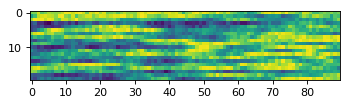

In [52]:
fig = plt.figure(figsize=(5, 5), dpi=80)
plt.imshow(transp_dist[:20,:],interpolation='none')

No handles with labels found to put in legend.


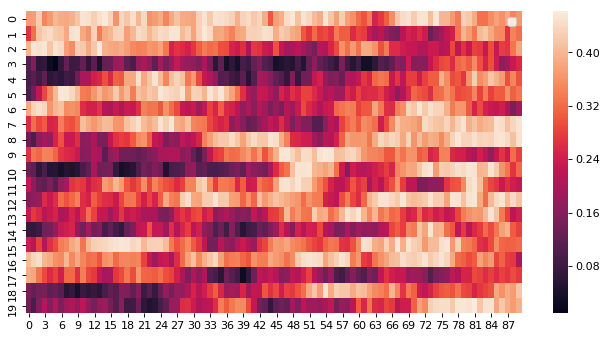

In [53]:
fig = plt.figure(figsize=(10, 5), dpi=80)
plt.ylabel('origin-distance')
plt.xlabel('time(s)')
plt.legend()
# plt.imshow(distances,interpolation='none')
ax = sns.heatmap(transp_dist[:20,:])

In [54]:
# fname = "/home/luigi/Desktop/array"
# np.savetxt(fname, distances[:,:30], fmt='%1.3f') 

In [55]:
distances.shape

(90, 1500)

In [56]:
# bin_edges = [0,0.1,0.2,0.3, 0.4,0.5]
bin_edges = np.linspace(0, 0.475,20) 
print(bin_edges.size)

20


In [57]:
transp_dist.shape

(1500, 90)

In [75]:
# n_robots x n_times
n_robots = 10
n_times = 15
trnsp_temp = transp_dist[:n_robots,:n_times]
temp = distances[:n_times, :n_robots]
# print(temp)

In [59]:
# numeri = np.array([])
# for x in temp:
# #     print(x)
#     n, _, _ = plt.hist(x, bins=bin_edges, facecolor='blue', alpha=0.5)
#     print(n,"\n")

In [60]:
plt.style.use('seaborn-deep')

In [61]:
numeri = np.array([])
i=0
for x in distances:
    hist, _ = np.histogram(x, bin_edges)
#     print(i,hist)
    i+=1
    numeri = np.vstack([numeri,hist]) if numeri.size else hist

In [62]:
print(bin_edges[1:])
print()
print(numeri[:5,:])

[0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475]

[[ 12  32  53  58  77  91  94  89  92  87 110  92  95 121 118  92  89  65  33]
 [ 11  26  49  59  78  78  97  84  97 102  87 132 103  98  90  87  80  93  49]
 [ 11  21  49  63  63  74  97  87  95  97 114 119 116  85  90  95  84  88  52]
 [  7  21  40  52  74  76  92  96 106  98  94 111 109  95  96  96  92  82  63]
 [  8  21  34  50  70  89  87  97  98  96 111 101 101 108  99  80  94  99  57]]


In [63]:
sample = np.copy(numeri)

In [64]:
# sample[:,0] = np.arange(5)

In [65]:
print(bin_edges[1:], "\n\n", sample[:10])

[0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475] 

 [[ 12  32  53  58  77  91  94  89  92  87 110  92  95 121 118  92  89  65  33]
 [ 11  26  49  59  78  78  97  84  97 102  87 132 103  98  90  87  80  93  49]
 [ 11  21  49  63  63  74  97  87  95  97 114 119 116  85  90  95  84  88  52]
 [  7  21  40  52  74  76  92  96 106  98  94 111 109  95  96  96  92  82  63]
 [  8  21  34  50  70  89  87  97  98  96 111 101 101 108  99  80  94  99  57]
 [  9  22  30  56  77  80  81 101  78 124  94 100 107  89 101  90 104  97  60]
 [  9  21  38  57  65  76  86  86  88  97  94  91 120 106  90 107  88 101  80]
 [  8  16  43  50  50  72  86  92  92  95 101  97 111 106  92 105  91 106  87]
 [ 12  21  38  39  60  57  78  79 102 114  95 102  91  93 102 110 109 127  71]
 [  8  13  39  46  62  55  76  82  94  91  99 109 103 100 105 108 106 122  82]]


In [66]:
for i in range(bin_edges[1:].size):
    area = np.pi * (np.square(bin_edges[1:][i])-np.square(bin_edges[1:][i-1])) if i else np.pi * np.square(bin_edges[1:][i])
    print(area)
    sample[:,i] = np.true_divide(sample[:,i], area)

0.0019634954084936204
0.005890486225480861
0.009817477042468103
0.01374446785945534
0.01767145867644258
0.021598449493429837
0.02552544031041706
0.029452431127404304
0.03337942194439154
0.037306412761378784
0.04123340357836603
0.04516039439535332
0.04908738521234043
0.053014376029327806
0.05694136684631496
0.06086835766330225
0.06479534848028949
0.06872233929727666
0.07264933011426407


In [67]:
sample[:10]

array([[6111, 5432, 5398, 4219, 4357, 4213, 3682, 3021, 2756, 2332, 2667, 2037, 1935, 2282, 2072, 1511, 1373,  945,  454],
       [5602, 4413, 4991, 4292, 4413, 3611, 3800, 2852, 2905, 2734, 2109, 2922, 2098, 1848, 1580, 1429, 1234, 1353,  674],
       [5602, 3565, 4991, 4583, 3565, 3426, 3800, 2953, 2846, 2600, 2764, 2635, 2363, 1603, 1580, 1560, 1296, 1280,  715],
       [3565, 3565, 4074, 3783, 4187, 3518, 3604, 3259, 3175, 2626, 2279, 2457, 2220, 1791, 1685, 1577, 1419, 1193,  867],
       [4074, 3565, 3463, 3637, 3961, 4120, 3408, 3293, 2935, 2573, 2691, 2236, 2057, 2037, 1738, 1314, 1450, 1440,  784],
       [4583, 3734, 3055, 4074, 4357, 3703, 3173, 3429, 2336, 3323, 2279, 2214, 2179, 1678, 1773, 1478, 1605, 1411,  825],
       [4583, 3565, 3870, 4147, 3678, 3518, 3369, 2919, 2636, 2600, 2279, 2015, 2444, 1999, 1580, 1757, 1358, 1469, 1101],
       [4074, 2716, 4379, 3637, 2829, 3333, 3369, 3123, 2756, 2546, 2449, 2147, 2261, 1999, 1615, 1725, 1404, 1542, 1197],
       [6111, 35

In [68]:
bin_edges[1:][1]

0.049999999999999996

In [69]:
bin_edges= bin_edges.round(decimals=3)

In [70]:
bin_edges[1:]

array([0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  , 0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425, 0.45 , 0.475])

In [71]:
transp_numeri = sample.T#numeri.T

No handles with labels found to put in legend.


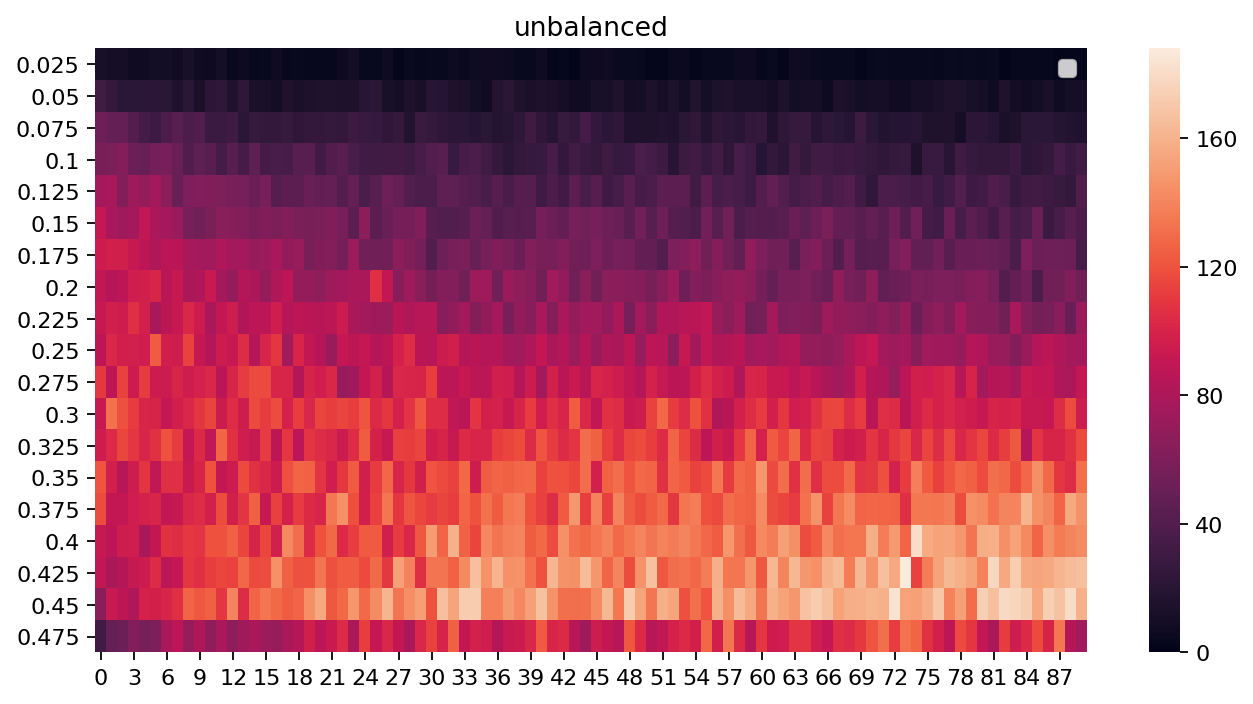

In [72]:
time_plot_histogram("unbalanced",numeri.T, bin_edges[1:])

No handles with labels found to put in legend.


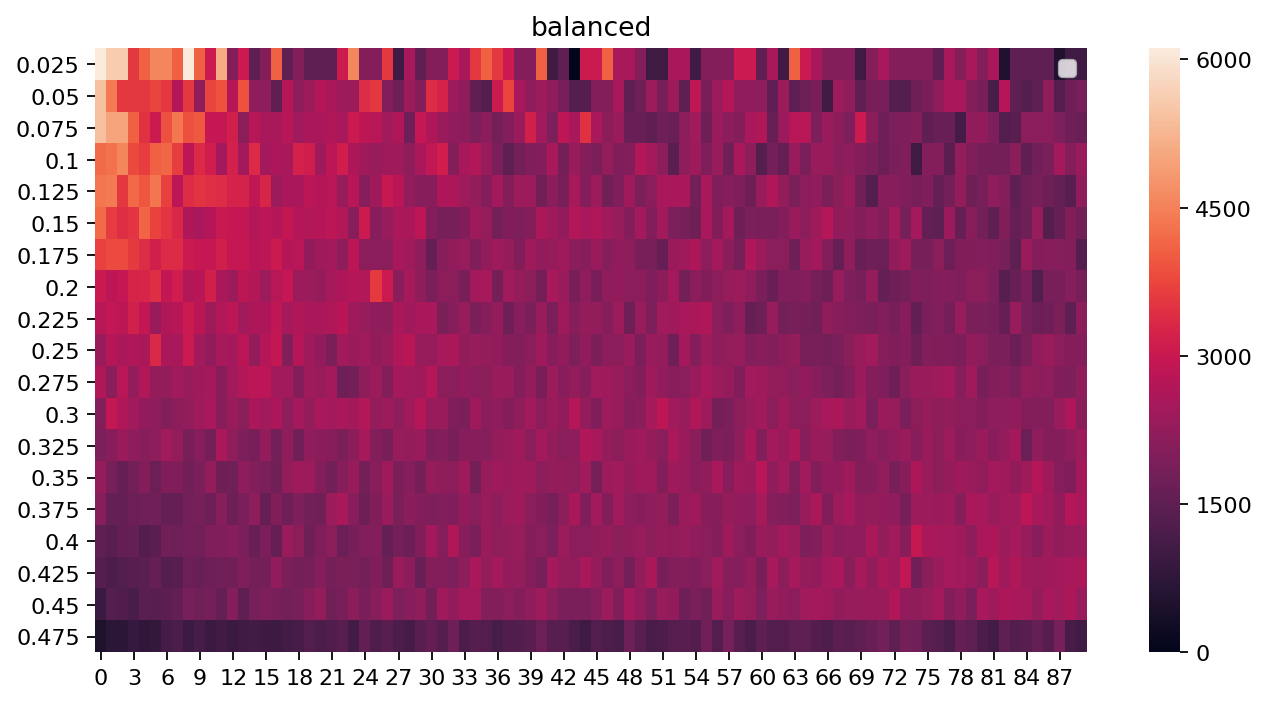

In [73]:
time_plot_histogram("balanced",transp_numeri, bin_edges[1:])

In [ ]:
def plot_histogram(distance, edges):
    n, bins, patches = plt.hist(distance, bins=edges, facecolor='blue', alpha=0.5)
#     print("n",n)
#     print("bins",bins)
#     print("patches",patches)
    plt.show()

In [ ]:
plot_histogram(distances[0],bin_edges)

In [ ]:
plot_histogram(distances[10],bin_edges)

In [ ]:
plot_histogram(distances[80],bin_edges)

In [ ]:
plot_histogram(distances[89],bin_edges)